In [1]:
import fenics

class FenicsFunctionSmoother:
    def __init__(me, function_space_V, smoothing_time=1e-2, num_timesteps=10):
        me.num_timesteps = num_timesteps
        me.dt = smoothing_time / num_timesteps

        u = fenics.TrialFunction(function_space_V)
        v = fenics.TestFunction(function_space_V)

        mass_form = u * v * fenics.dx
        stiffness_form = fenics.inner(fenics.grad(u), fenics.grad(v)) * fenics.dx

        me.M = fenics.assemble(mass_form)
        Z = fenics.assemble(mass_form + me.dt * stiffness_form)

        me.Z_solver = fenics.LUSolver(Z)

    def smooth(me, function_f):
        for k in range(me.num_timesteps):
            me.Z_solver.solve(function_f.vector(), me.M * function_f.vector())


# Test

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n=40
smoothing_times = [1e-4, 1e-3, 1e-2]

Text(0.5, 1.0, 'unsmoothed')

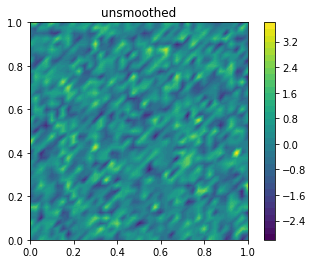

In [4]:
mesh = fenics.UnitSquareMesh(40,40)
V = fenics.FunctionSpace(mesh, 'CG', 1)

f = fenics.Function(V)
f_vec = np.random.randn(V.dim())
f.vector()[:] = f_vec

plt.figure()
c = fenics.plot(f)
plt.colorbar(c)
plt.title('unsmoothed')

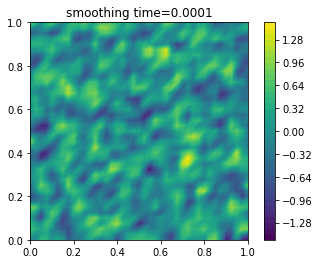

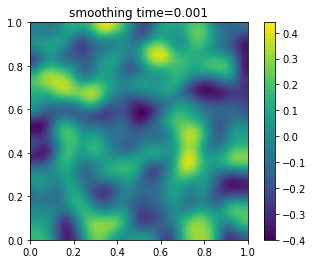

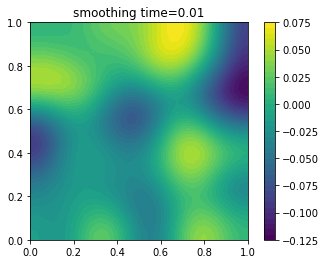

In [5]:
for smoothing_time in smoothing_times:
    smoother = FenicsFunctionSmoother(V, smoothing_time=smoothing_time)

    f.vector()[:] = f_vec
    smoother.smooth(f)

    plt.figure()
    c = fenics.plot(f)
    plt.colorbar(c)
    plt.title('smoothing time=' + str(smoothing_time))